In [39]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
import numpy as np

In [40]:
# Generate 2D classification data with 2 classes and 150 samples
X, y = make_classification(n_samples=150, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=12)

In [41]:
X, y

(array([[-1.20615534,  0.51347068],
        [-1.51414429, -0.49606469],
        [-1.09420537, -0.88852057],
        [-0.50516949,  1.24597589],
        [-0.35013113, -0.7582104 ],
        [ 1.17993836, -2.2039904 ],
        [ 0.83174273,  0.42983982],
        [ 0.61146863, -0.71293891],
        [-1.64927838,  0.68441073],
        [ 0.69741492,  0.4597736 ],
        [ 1.39396106,  1.17027307],
        [ 1.14823288,  0.35765888],
        [-0.29712005,  0.66873204],
        [-1.81688143, -0.33901855],
        [ 0.66074828, -1.66834694],
        [-1.44178492, -3.13151754],
        [-0.41351336,  1.222523  ],
        [ 0.7045037 ,  0.72166914],
        [-1.1608137 , -0.01626839],
        [-0.09366793, -1.59086383],
        [-0.58595018,  0.74538751],
        [ 0.833669  ,  2.69383128],
        [-1.52574168, -0.36622783],
        [-3.39519825, -2.18013853],
        [ 1.96213843,  0.93703695],
        [-1.76332054, -0.74470506],
        [-0.60947542,  0.62112507],
        [-3.20693236, -3.972

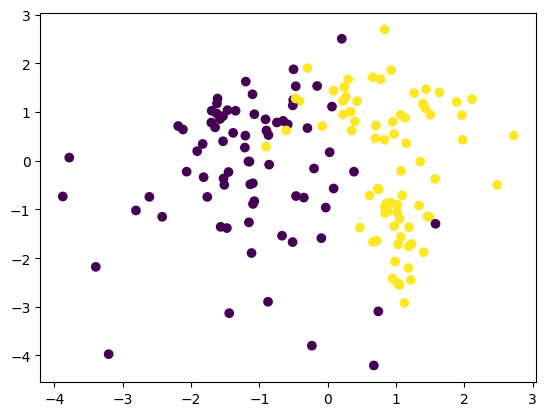

In [42]:
# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

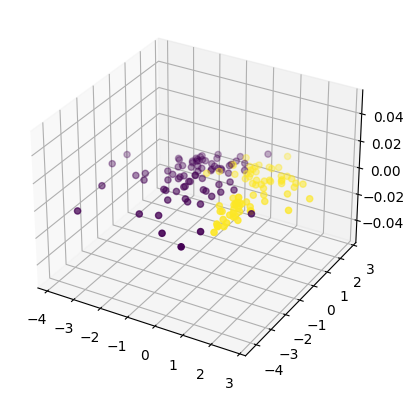

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], c=y)
plt.show()
# a 2D sigmoid would fit the data, third dimension being the probability when sigmoid is plotted.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Implement the following algorithms for the above classification dataset with two variables
Show/print the changing weights after each epoch.


Optimize the parameters on train set and measure the classification performance (any metric) on test set.

In [45]:
def f(w,b,x): 
    return 1.0 / (1.0 + np.exp(-(w*x + b)))

def error (w, b):
    err = 0.0
    for x,y in zip(X,Y) :
        fx = f(w,b,x)
        err += 0.5 * (fx - y) ** 2
    return err

def grad_b(w,b,x,y):
    fx = f(w,b,x)
    return (fx - y) * fx * (1 - fx)

def grad_w(w,b,x,y) :
    fx = f(w,b,x)
    return (fx - y) * fx * (1 - fx) * x

In [46]:
X = X_train
Y = y_train


![nesterov.png](attachment:nesterov.png)

In [47]:
# 1. nestrov accelerated gradient descent (Module 5.5)
def nesterov_acc_gd(X,Y):
    w, b, eta, max_epochs = -1, -1, 1.0, 1000
    prev_v_w,prev_v_b,gamma = 0, 0, 0.5
    for i in range(max_epochs):
        dw,db=0,0
        v_w = gamma* prev_v_w
        v_b = gamma* prev_v_b
        
        
        for x,y in zip(X,Y):
            dw+=grad_w(w - v_w  , b - v_b,x,y)
            db+=grad_b(w - v_w  , b - v_b,x,y)
            
        v_w = gamma * prev_v_w + eta * dw
        v_b = gamma * prev_v_b + eta * db
        w = w - v_w
        b = b - v_b
        prev_v_w=v_w
        prev_v_b=v_b
        print(f"Weight after Epoch:{i+1} = {w}")
        print(f"Bias after Epoch:{i+1} = {b}\n")
        
    return w,b
        
w,b = nesterov_acc_gd(X,Y)

print("Weights after 1000 epochs in Nesterov GD", w)
print("Bias after 1000 epochs in Nesterov GD", b)


Weight after Epoch:1 = [9.98128325 2.34102354]
Bias after Epoch:1 = [-2.49825584  0.31247209]

Weight after Epoch:2 = [15.51132035  3.35957245]
Bias after Epoch:2 = [-3.00544444  0.35306822]

Weight after Epoch:3 = [18.28501717  2.99598976]
Bias after Epoch:3 = [-3.16573437 -0.44509685]

Weight after Epoch:4 = [19.66975242  0.78777676]
Bias after Epoch:4 = [-3.20522764 -2.41362553]

Weight after Epoch:5 = [20.35598338 -0.53607263]
Bias after Epoch:5 = [-3.20419933 -2.05311713]

Weight after Epoch:6 = [20.69124067 -0.03070552]
Bias after Epoch:6 = [-3.19160866 -0.20603314]

Weight after Epoch:7 = [20.85018233  0.07981672]
Bias after Epoch:7 = [-3.17753309 -4.34680637]

Weight after Epoch:8 = [20.92053078  0.16138421]
Bias after Epoch:8 = [-3.16502498 -6.33839063]

Weight after Epoch:9 = [20.94633881  0.21572441]
Bias after Epoch:9 = [-3.1546184 -7.3017419]

Weight after Epoch:10 = [20.94973316  0.25276051]
Bias after Epoch:10 = [-3.14604955 -7.76231778]

Weight after Epoch:11 = [20.9418

In [48]:
# 2. nestrov accelerated stochastic gradient descent
import random

def nesterov_acc_sgd(X, Y, batch_size=1):
    w, b, eta, max_epochs = -1, -1, 1.0, 1000
    prev_v_w, prev_v_b, gamma = 0, 0, 0.5
    
    for i in range(max_epochs):
        for j in range(0, len(X), batch_size):
            dw, db = 0, 0
            v_w = gamma * prev_v_w
            v_b = gamma * prev_v_b
            
            for x, y in zip(X[j:j + batch_size], Y[j:j + batch_size]):
                dw += grad_w(w - v_w, b - v_b, x, y)
                db += grad_b(w - v_w, b - v_b, x, y)
            
            v_w = gamma * prev_v_w + eta * dw
            v_b = gamma * prev_v_b + eta * db
            w = w - v_w
            b = b - v_b
            prev_v_w = v_w
            prev_v_b = v_b
        print(f"Weight after Epoch:{i+1} = {w}")
        print(f"Bias after Epoch:{i+1} = {b}\n")
            
    return w, b

w,b = nesterov_acc_sgd(X, Y)

print("Weights after 1000 epochs in Nesterov SGD", w)
print("Bias after 1000 epochs in Nesterov SGD", b)


Weight after Epoch:1 = [ 2.30239568 -0.71909994]
Bias after Epoch:1 = [-0.45622449 -0.69877853]

Weight after Epoch:2 = [ 2.71263482 -0.71899301]
Bias after Epoch:2 = [-0.48220815 -0.6984237 ]

Weight after Epoch:3 = [ 2.9345655  -0.71899307]
Bias after Epoch:3 = [-0.50376618 -0.69842373]

Weight after Epoch:4 = [ 3.08127904 -0.71899307]
Bias after Epoch:4 = [-0.51962539 -0.69842373]

Weight after Epoch:5 = [ 3.18743547 -0.71899307]
Bias after Epoch:5 = [-0.53172969 -0.69842373]

Weight after Epoch:6 = [ 3.26835938 -0.71899307]
Bias after Epoch:6 = [-0.54126045 -0.69842373]

Weight after Epoch:7 = [ 3.3321814  -0.71899307]
Bias after Epoch:7 = [-0.5489412  -0.69842373]

Weight after Epoch:8 = [ 3.38372995 -0.71899307]
Bias after Epoch:8 = [-0.55524068 -0.69842373]

Weight after Epoch:9 = [ 3.426103   -0.71899307]
Bias after Epoch:9 = [-0.56047797 -0.69842373]

Weight after Epoch:10 = [ 3.46140391 -0.71899307]
Bias after Epoch:10 = [-0.56487915 -0.69842373]

Weight after Epoch:11 = [ 3.

Making the matrix sparse

In [49]:
indices = np.random.choice(np.arange(X.shape[0]), replace=False,
                           size=int(X.shape[0] * 0.8))
for index in indices:
    X[index][0] = 0

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [51]:
indices

array([ 58,  89,  37,  39,  23,  13,  53,  52,  87,  68,   8,  16,   0,
        80,  63, 103,  99,  36,  67,  11,  10,  66,  51,  95,  27,  70,
       101, 104,  20,  83,  94,  18,  47,  29,  34, 100,  72,  77,  14,
        97,  48,  85,   7,  45,  75,  42,   5,  21,  25,  31,   9,  30,
        76,  46,  79,   4,  56,  54,  84,   3,  90,  12,  33,  78,  19,
        82,  93,  55,  59,  44,  88,   6,  50,  17,  61,  24,  71,  64,
        60,  15,  28,  81,  62,  38])

Implement the following algorithms for the above sparse dataset with two variables Show/print the changing weights after each epoch.

Optimize the parameters on train set and measure the classification performance (any metric) on test set.

In [52]:
# 1. nestrov accelerated gradient descent (Module 5.5)
nesterov_acc_gd(X_train,y_train)

Weight after Epoch:1 = [0.26063816 1.23915796]
Bias after Epoch:1 = [ 0.54462849 -0.3990876 ]

Weight after Epoch:2 = [1.55862028 0.81304094]
Bias after Epoch:2 = [-3.24982653 -1.41272613]

Weight after Epoch:3 = [2.6524541  1.75337186]
Bias after Epoch:3 = [-4.64408625  0.47086863]

Weight after Epoch:4 = [3.87284776 1.61693371]
Bias after Epoch:4 = [-4.64538914 -0.13771723]

Weight after Epoch:5 = [ 5.12703639 -0.5029837 ]
Bias after Epoch:5 = [-3.74129762 -1.63466442]

Weight after Epoch:6 = [ 5.87906913 -1.47778751]
Bias after Epoch:6 = [-2.38114933 -1.57896292]

Weight after Epoch:7 = [ 6.26180625 -0.45417197]
Bias after Epoch:7 = [ 0.12712652 -1.94325195]

Weight after Epoch:8 = [6.47543637 0.6191407 ]
Bias after Epoch:8 = [-2.64993006  0.10616942]

Weight after Epoch:9 = [6.72277658e+00 9.61141355e-04]
Bias after Epoch:9 = [-3.45608079 -1.58665007]

Weight after Epoch:10 = [ 6.94713998 -0.24982277]
Bias after Epoch:10 = [-3.26589887 -0.68006379]

Weight after Epoch:11 = [7.09645

(array([13.23735462,  1.57209481]), array([-2.47128694, -2.22734481]))

![adam.png](attachment:adam.png)

In [53]:
# 2. adaptive moment estimation (adam) (Module 5.9)
import numpy as np

def adam_sgd(X, Y, batch_size=1):
    w, b, eta, max_epochs = -1, -1, 0.001, 1000
    prev_m_w, prev_v_w, prev_m_b, prev_v_b = 0, 0, 0, 0
    beta1, beta2, epsilon = 0.9, 0.999, 1e-8
    
    for i in range(max_epochs):
        for j in range(0, len(X), batch_size):
            dw, db = 0, 0
            
            for x, y in zip(X[j:j + batch_size], Y[j:j + batch_size]):
                dw += grad_w(w, b, x, y)
                db += grad_b(w, b, x, y)
            
            m_w = beta1 * prev_m_w + (1 - beta1) * dw
            v_w = beta2 * prev_v_w + (1 - beta2) * (dw ** 2)
            m_b = beta1 * prev_m_b + (1 - beta1) * db
            v_b = beta2 * prev_v_b + (1 - beta2) * (db ** 2)
            
            m_w_hat = m_w / (1 - beta1 ** (i + 1))
            v_w_hat = v_w / (1 - beta2 ** (i + 1))
            m_b_hat = m_b / (1 - beta1 ** (i + 1))
            v_b_hat = v_b / (1 - beta2 ** (i + 1))
            
            w = w - eta * m_w_hat / (np.sqrt(v_w_hat) + epsilon)
            b = b - eta * m_b_hat / (np.sqrt(v_b_hat) + epsilon)
            
            prev_m_w, prev_v_w, prev_m_b, prev_v_b = m_w, v_w, m_b, v_b
        
        print(f"Weight after Epoch:{i+1} = {w}")
        print(f"Bias after Epoch:{i+1} = {b}\n")
    
    return w, b

w, b = adam_sgd(X, Y)

print("Weights after 1000 epochs in Adam SGD", w)
print("Bias after 1000 epochs in Adam SGD", b)


Weight after Epoch:1 = [-0.95235191 -0.94801258]
Bias after Epoch:1 = [-0.96830593 -0.98729672]

Weight after Epoch:2 = [-0.92988371 -0.92764236]
Bias after Epoch:2 = [-0.95372556 -0.97840252]

Weight after Epoch:3 = [-0.91459572 -0.91388372]
Bias after Epoch:3 = [-0.94375248 -0.97201902]

Weight after Epoch:4 = [-0.9025289  -0.90308238]
Bias after Epoch:4 = [-0.93590159 -0.96685407]

Weight after Epoch:5 = [-0.89227471 -0.89394284]
Bias after Epoch:5 = [-0.9292586  -0.96239723]

Weight after Epoch:6 = [-0.88316616 -0.88585376]
Bias after Epoch:6 = [-0.9233855  -0.95839495]

Weight after Epoch:7 = [-0.87483374 -0.87847754]
Bias after Epoch:7 = [-0.91803845 -0.95470271]

Weight after Epoch:8 = [-0.86705094 -0.87160779]
Bias after Epoch:8 = [-0.91306774 -0.95123016]

Weight after Epoch:9 = [-0.85966866 -0.865109  ]
Bias after Epoch:9 = [-0.90837483 -0.94791693]

Weight after Epoch:10 = [-0.85258335 -0.85888735]
Bias after Epoch:10 = [-0.90389141 -0.9447206 ]

Weight after Epoch:11 = [-0.